<a href="https://colab.research.google.com/github/hugohdezm03/TID-Perceptron-Multicapa/blob/main/Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Componentes del grupo

- José Fenic Peiteado Padilla
- Adrián Mora Rodríguez
- Hugo Hernández Martín
- Juan Rodríguez Suárez

#Librerías requeridas, carga y análisis de los datos

## Carga de librerías

In [ ]:
if (!require(mice)) install.packages("mice")
library(mice)
if (!require(scales)) install.packages("scales")
library(scales)
if (!require(caret)) install.packages("caret")
library(caret)
if (!require(corrplot)) install.packages("corrplot")
library(corrplot)
if (!require(polycor)) install.packages("polycor")
library(polycor)
if (!require(rsample)) install.packages("rsample")
library(rsample)

Loading required package: rsample

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rsample’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘warp’, ‘furrr’, ‘slider’




## Carga de datos y análisis de variables

In [ ]:
mydata <- read.csv(file="/content/sample_data/bank-additional-full.csv", header = TRUE, sep = ";")
head(mydata) # Ver la primera fila del data frame

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


| **Nombre Variable** | **Significado**                                                                 | **Valores posibles**                                                                                     |
|---------------------|---------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| `age`               | Edad                                                                           | Numérica                                                                                                |
| `job`               | Tipo de trabajo                                                                | Categórica (admin, blue-collar, housemaid, etc.)                                                        |
| `marital`           | Estado Civil                                                                   | Categórica (divorciado, casado, soltero, desconocido)                                                   |
| `education`         | Educación                                                                      | Categórica (basic 4y, basic 9y, high school, illiterate, professional course, university)              |
| `default`           | Tiene crédito por defecto                                                      | Categórica (yes, no, unknown)                                                                           |
| `housing`           | Hipoteca                                                                       | Categórica (yes, no, unknown)                                                                           |
| `loan`              | Préstamo                                                                       | Categórica (yes, no, unknown)                                                                           |
| `contact`           | Cómo contactar                                                                 | Categórica (cellular, telephone)                                                                       |
| `month`             | Mes del último contacto del año                                                | Categórica (jan, feb, mar, …, nov, dec)                                                                 |
| `day_of_week`       | Día de la semana del último contacto                                           | Categórica (mon, tue, wed, thu, fri)                                                                   |
| `duration`          | Duración en segundos del contacto (info importante, afecta output significativamente) | Numérica                                                                                                |
| `campaign`          | Número de contactos durante la campaña para el cliente (incluye el último contacto) | Numérica                                                                                                |
| `pdays`             | Número de días que han pasado desde que el cliente fue contactado por una campaña anterior| Numérica (Hasta 999)                                                                                    |
| `previous`          | Número de contactos que se hizo antes de esta campaña para el cliente         | Numérica                                                                                                |
| `poutcome`          | Resultado de la campaña anterior                                               | Categórica (failure, nonexistent, success)                                                             |
| `emp.var.rate`      | Ratio de variación de empleo (Indicador cuatrimestral)                         | Numérica                                                                                                |
| `cons.price.idx`    | Índice de precio del consumidor (Indicador mensual)                           | Numérica                                                                                                |
| `cons.conf.idx`     | Índice de la confianza del consumidor (Indicador mensual)                      | Numérica                                                                                                |
| `euribor3m`         | Ratio del Euribor (Indicador trimestral)                                       | Numérico                                                                                                |
| `nr.employed`       | Número de empleados (Indicador cuatrimestral)                                  | Numérico                                                                                                |
| `y`                 | Cliente suscrito al depósito a plazos (VARIABLE A PREDECIR)                    | Binaria (yes, no)                                                                                       |


#Preprocesamiento de los datos

## Plan de procesamiento de datos

### Valores Nulos
- **Comprobación:** Aunque no hay valores nulos explícitos, hay valores como `unknown` que podrían considerarse nulos.
- **Tratamiento:**
  - Reemplazar valores `unknown` por `NA`.
  - Imputar los valores `NA`.

### Outliers
- **Identificación:** Utilizar el rango intercuartil (IQR) o técnicas de visualización como gráficos de caja (boxplots).
- **Tratamiento:**
  - Estudiar outliers

### Codificación de Variables Categóricas
- **One-Hot Encoding:** Convertir variables categóricas en dummies (`job`, `marital`, `contact`, etc.).

### Normalización
- Normalizar variables numéricas según sea necesario (`age`, `duration`, etc.).

### Selección de Características
- Eliminar características irrelevantes o redundantes.
- Realizar análisis de correlación para identificar variables altamente correlacionadas.


## Comprobación y corrección de tipos cargados

In [ ]:
str(mydata)

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr  "housemaid" "services" "services" "admin." ...
 $ marital       : chr  "married" "married" "married" "married" ...
 $ education     : chr  "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr  "no" "unknown" "no" "no" ...
 $ housing       : chr  "no" "no" "yes" "no" ...
 $ loan          : chr  "no" "no" "no" "no" ...
 $ contact       : chr  "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr  "may" "may" "may" "may" ...
 $ day_of_week   : chr  "mon" "mon" "mon" "mon" ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : int  999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "nonexistent" ...
 $ emp.var.rate  : num  1.1 1.1 1.1 1

In [ ]:
mydata$job <- as.factor(mydata$job)
mydata$marital <- as.factor(mydata$marital)
mydata$education <- as.factor(mydata$education)
mydata$default <- as.factor(mydata$default)
mydata$housing <- as.factor(mydata$housing)
mydata$loan <- as.factor(mydata$loan)
mydata$contact <- as.factor(mydata$contact)
mydata$month <- as.factor(mydata$month)
mydata$day_of_week <- as.factor(mydata$day_of_week)
mydata$poutcome <- as.factor(mydata$poutcome)
mydata$nr.employed <- as.integer(mydata$nr.employed)
mydata$y <- as.factor(mydata$y)

In [ ]:
str(mydata)

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

In [ ]:
summary(mydata) #  Resume de datos

      age                 job            marital     
 Min.   :17.00   admin.     :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar: 9254   married :24928  
 Median :38.00   technician : 6743   single  :11568  
 Mean   :40.02   services   : 3969   unknown :   80  
 3rd Qu.:47.00   management : 2924                   
 Max.   :98.00   retired    : 1720                   
                 (Other)    : 6156                   
               education        default         housing           loan      
 university.degree  :12168   no     :32588   no     :18622   no     :33950  
 high.school        : 9515   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    3   yes    :21576   yes    : 6248  
 professional.course: 5243                                                  
 basic.4y           : 4176                                                  
 basic.6y           : 2292                                                  
 (Other)            : 1749   

In [ ]:
mydata[!complete.cases(mydata),]

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>


## Reemplazar "unknown" por NA

In [ ]:
mydata[mydata == "unknown"] <- NA
na_counts <- colSums(is.na(mydata))
print(na_counts)

           age            job        marital      education        default 
             0            330             80           1731           8597 
       housing           loan        contact          month    day_of_week 
           990            990              0              0              0 
      duration       campaign          pdays       previous       poutcome 
             0              0              0              0              0 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
             0              0              0              0              0 
             y 
             0 


In [ ]:
# Generar el conjunto imputado
mydata_imputed <- mice(mydata, m = 5, method = 'pmm', maxit = 5, seed = 123)
# Seleccionar el conjunto imputado completo
mydata <- complete(mydata_imputed, 1)

In [ ]:
print("Valores NA después de la imputación:")
na_counts_after <- colSums(is.na(mydata))
print(na_counts_after)
# Resumen de la imputación
summary(mydata)

##Comprobacion de valores outliers

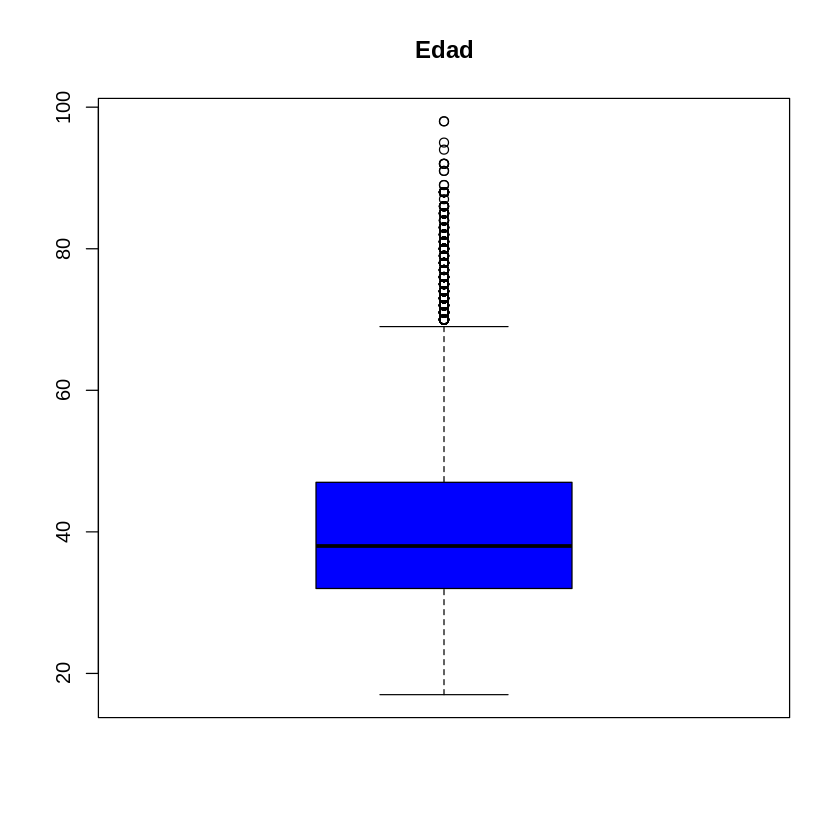

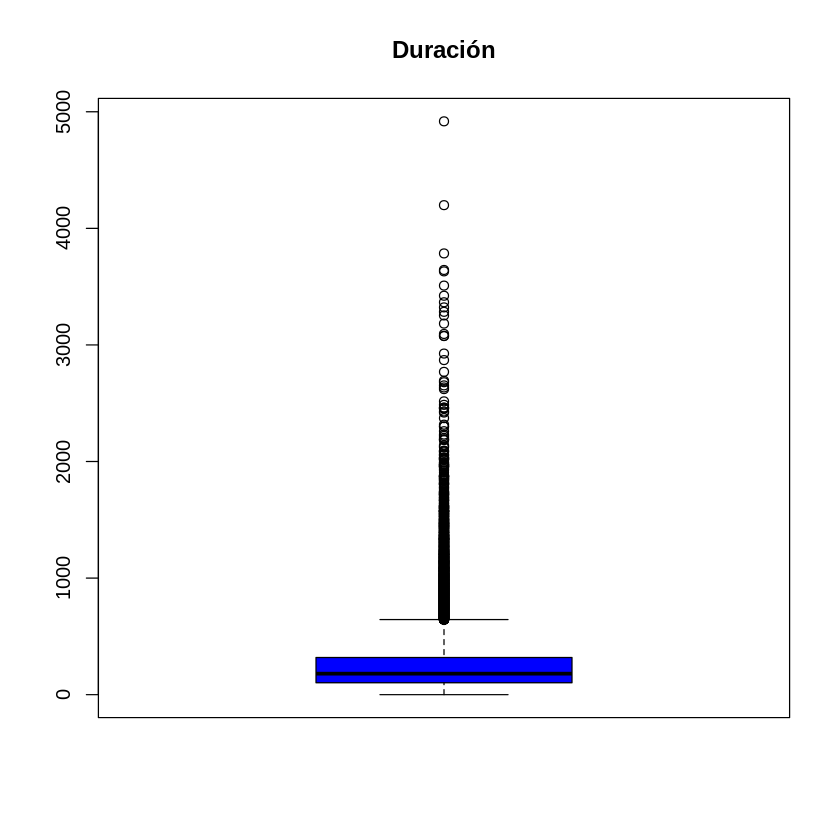

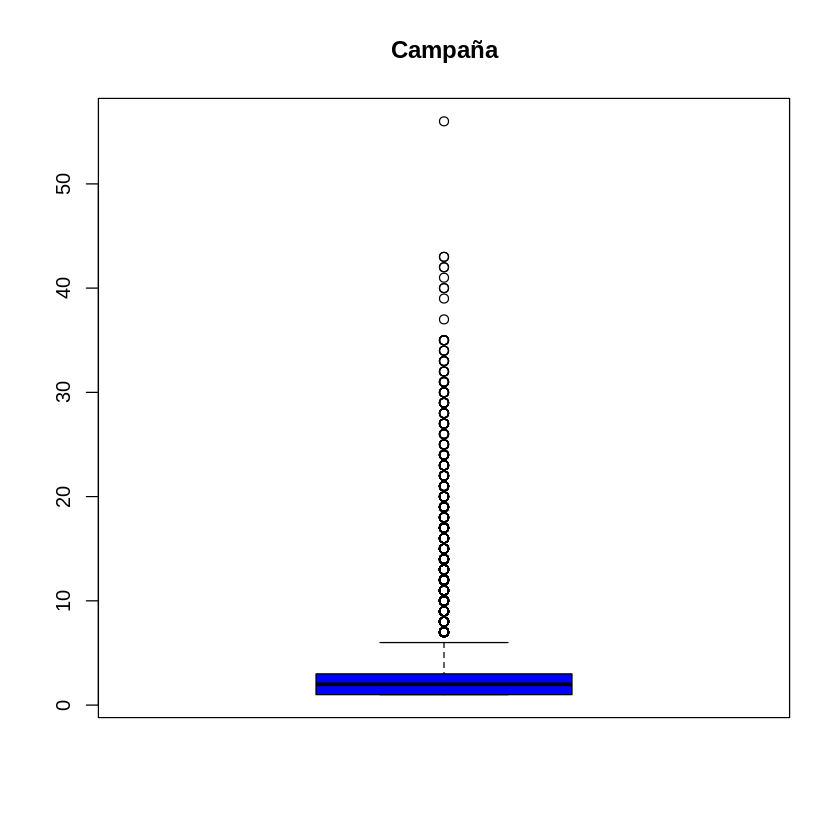

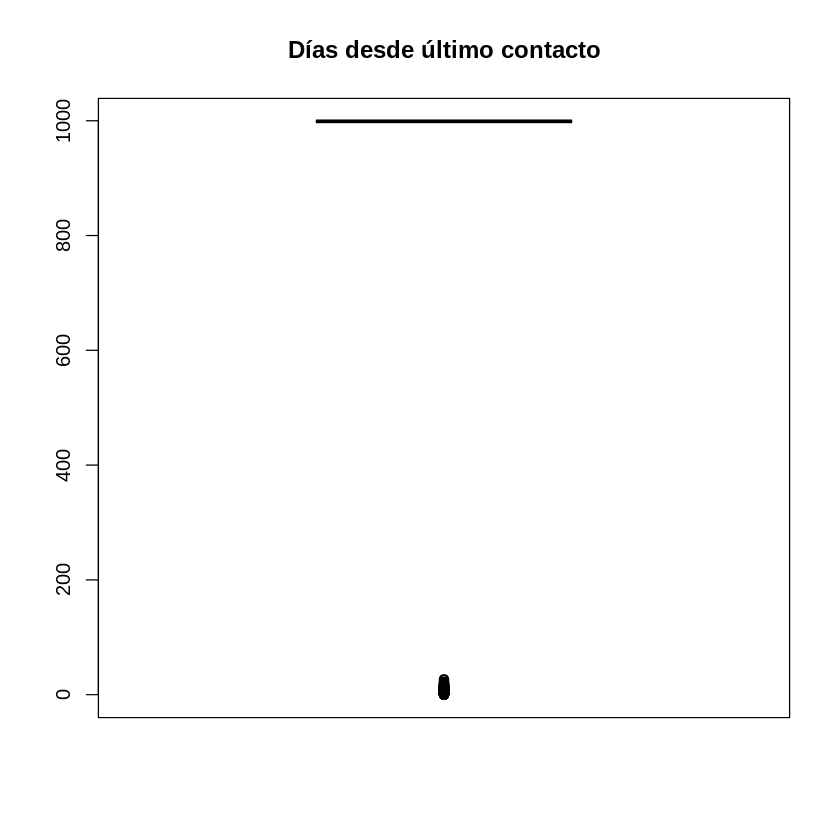

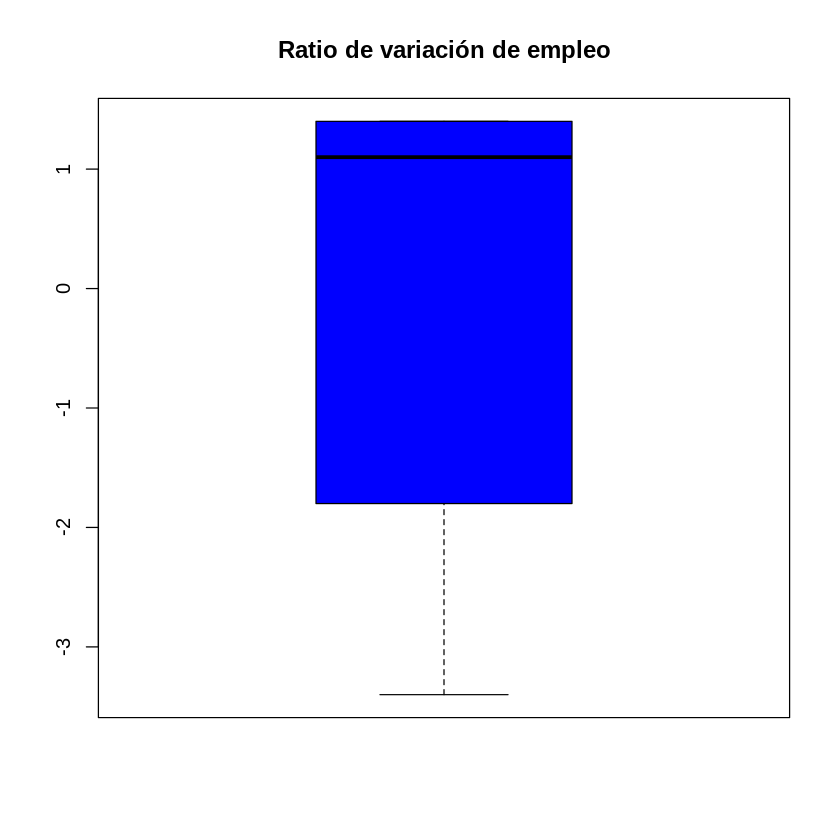

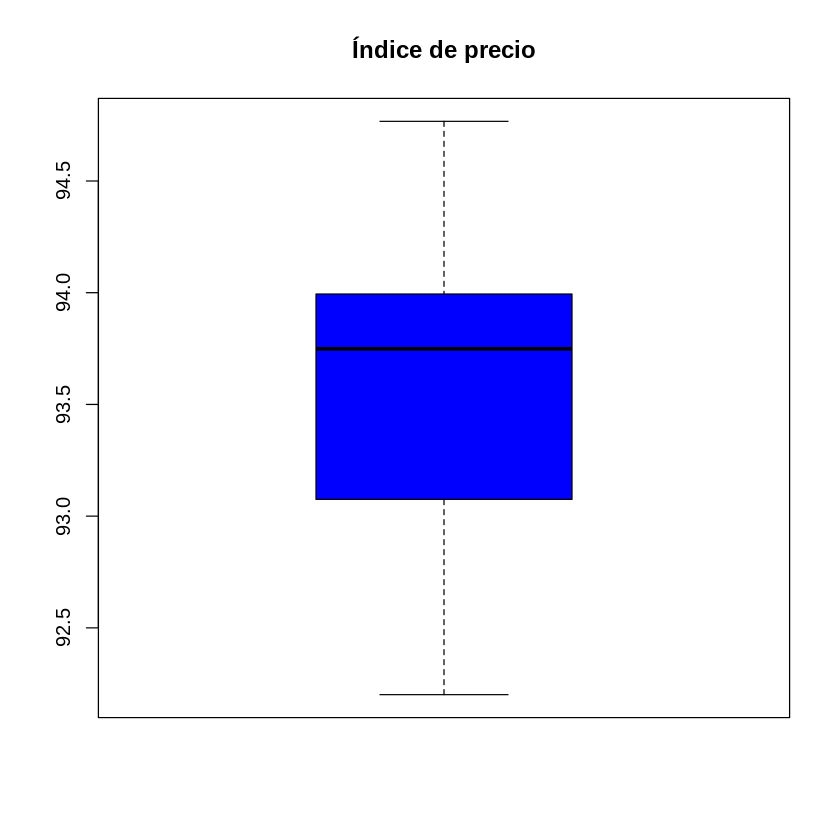

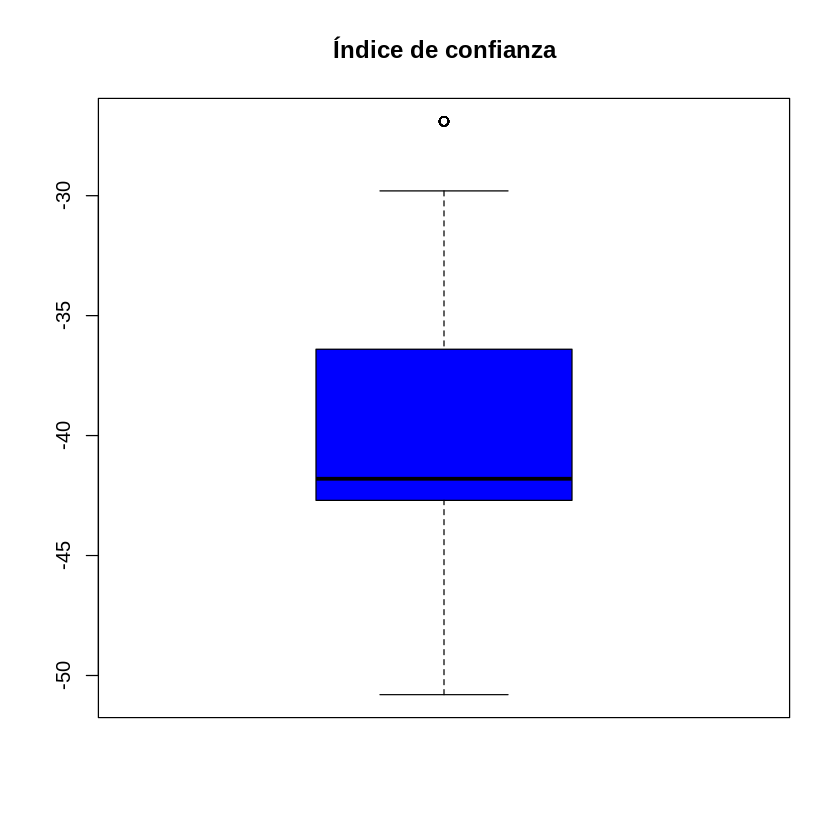

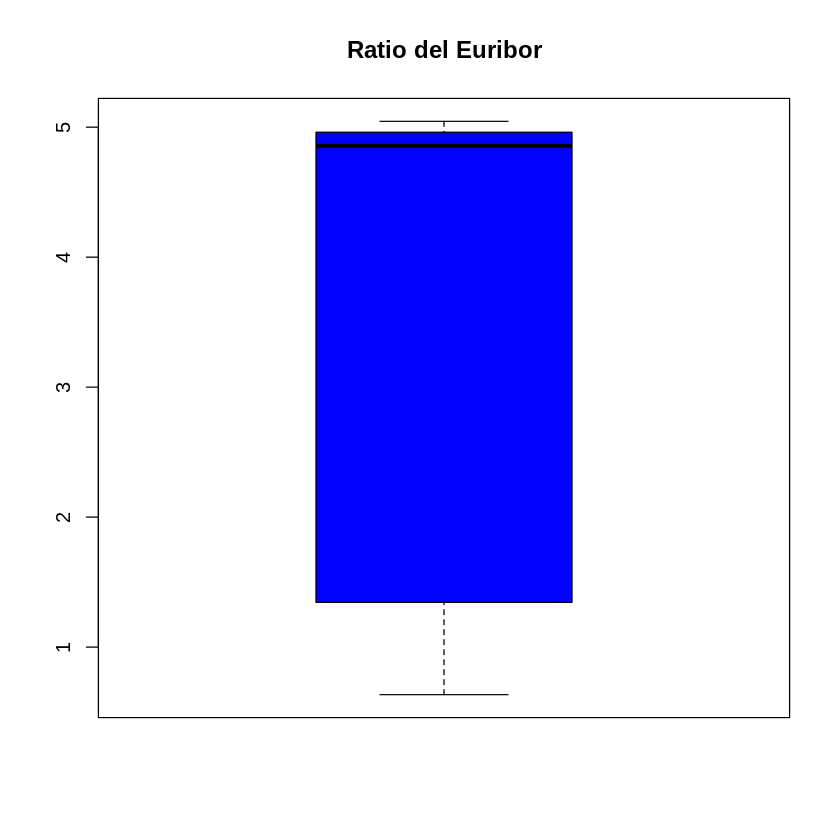

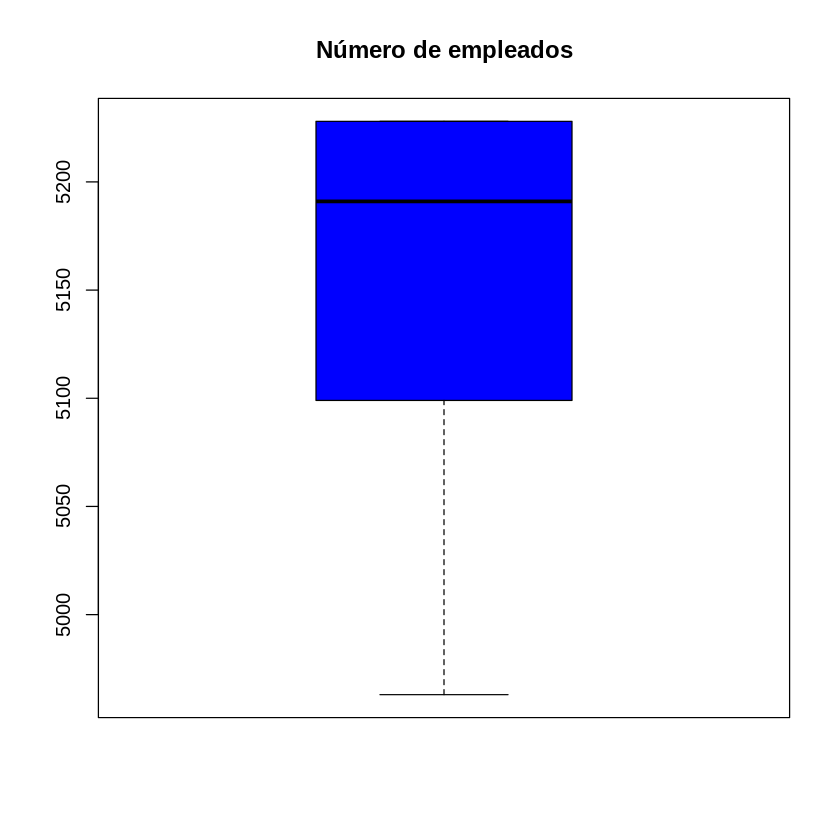

In [ ]:
box_age <- boxplot(mydata$age, main="Edad", col='blue')
box_duration <- boxplot(mydata$duration, main="Duración", col='blue')
box_campaign <- boxplot(mydata$campaign, main="Campaña", col='blue')
box_pdays <- boxplot(mydata$pdays, main="Días desde último contacto", col='blue')
box_emp.var.rate <- boxplot(mydata$emp.var.rate, main="Ratio de variación de empleo", col='blue')
box_cons.price.idx <- boxplot(mydata$cons.price.idx, main="Índice de precio", col='blue')
box_cons.conf.idx <- boxplot(mydata$cons.conf.idx, main="Índice de confianza", col='blue')
box_euribor3m <- boxplot(mydata$euribor3m, main="Ratio del Euribor", col='blue')
box_nr.employed <- boxplot(mydata$nr.employed, main="Número de empleados", col='blue')

In [ ]:
print("Outliers de Age: ")
box_age$out
print("Outliers de duration: ")
box_duration$out
print("Outliers de campaign: ")
box_campaign$out
print("Outliers de emp.var.rate: ")
box_emp.var.rate$out
print("Outliers de cons.price.idx: ")
box_cons.price.idx$out
print("Outliers de euribor3m: ")
box_euribor3m$out
print("Outliers de nr.employed: ")
box_nr.employed$out

[1] "Outliers de Age: "


[1] 70 76 73 88 88 88 88 88 88 88 88 88 88 88 88 88 95 70 70 70 77 75 70 70 73
 [26] 80 80 80 72 72 82 73 71 70 70 70 71 70 70 71 75 73 73 71 75 75 78 75 70 78
 [51] 75 78 85 85 85 80 71 85 85 79 77 83 81 71 81 73 71 71 88 81 81 81 71 83 75
 [76] 78 88 77 72 79 79 74 75 72 72 70 79 74 74 74 74 76 76 82 75 70 73 73 73 73
[101] 76 70 85 80 70 74 74 76 88 74 81 76 74 76 73 72 70 71 70 70 76 72 73 80 74
[126] 71 74 80 74 73 74 71 76 76 87 79 70 74 88 81 80 80 78 71 71 72 73 73 73 79
[151] 72 71 83 76 76 72 71 71 76 75 71 78 78 91 91 76 73 76 73 71 83 70 70 70 70
[176] 70 70 70 81 70 70 78 71 71 75 83 71 82 82 82 80 80 86 77 75 77 70 80 71 71
[201] 71 80 80 71 71 74 74 74 83 85 70 70 70 88 88 71 98 98 73 72 71 71 81 71 75
[226] 81 73 80 75 72 82 82 78 78 72 78 71 79 71 73 81 81 76 71 71 79 79 72 72 72
[251] 72 78 80 77 77 78 75 72 77 72 82 83 83 94 78 86 78 72 77 73 81 76 83 83 80
[276] 73 86 70 71 81 74 85 84 85 70 70 76 76 76 76 76 73 73 78 72 85 74 73 80 73
[301] 82 75 70 75 80 78 78 86 84 76 82 75 71 71 80 74 82 82 74 74 74 85 85 85 75
[326] 85 70 80 80 80 80 80 77 80 73 71 71 71 79 79 72 78 82 77 77 92 70 76 77 71
[351] 74 80 79 76 77 92 84 70 79 74 72 72 76 76 89 78 78 70 74 83 81 76 76 86 83
[376] 83 75 73 72 72 72 79 73 83 83 73 78 78 80 70 78 72 72 78 78 82 72 72 71 84
[401] 77 74 76 80 71 71 81 77 75 71 77 71 72 77 73 73 92 70 77 92 75 71 70 76 76
[426] 72 76 72 71 70 81 71 78 75 88 76 88 88 85 89 86 80 83 83 82 71 84 82 86 86
[451] 82 77 75 70 74 71 71 81 70 81 74 84 74 74 84 81 80 73 74

[1] "Outliers de duration: "


[1] 1666  787  812 1575 1042 1467  849  677 2033  843  673  717  683 1077
  [15]  730  702  962  935  742  669  680 1201 1030  769  673  744 1623  678
  [29]  699 1677  918  792 1297  695 1906  802  739 1597  716 1529  800  720
  [43]  852  992  732 1521  800 1138  786  799  866 1581  650 1101  912 1062
  [57]  688  803 1009  764 1273 1574  984 1689  865  944  813 1119 1120  784
  [71]  665  712 1007  789  756  989 1170  807 2087  767 1178 1120  956  985
  [85]  672  886 1187  826  732  847  659  772  929  710  705 2462 1132  825
  [99]  646  653  654 1087 1692 2016 1054  665 1713  663 1080 1461  750 1178
 [113]  878  834 1534  836 1002  757  744 1147  820  788  832 1111 1495  744
 [127]  891 1083 1266  793  907  723 1346 1386 3366 1000 2231  705 1167  806
 [141]  766  705 1015  683  730  768 1001  845  853  813  916  753  708  805
 [155]  768  788  851 1052  647  771 1093 1106  945  816 1721 1032  735  942
 [169]  832  824 1328  686 1125 1321  858  869  833  849  829  749 1028  784
 [183]  977  927  762  746  673 1044  668  726  902  852  738 1118  837 1423
 [197]  856  806  747 1013  646  746  735 1088 1074 1036  750  695 1000 1257
 [211] 1165  651  734  738  920 1244  918  719  815  911  973  920 1224  964
 [225] 1156 1231 1051 1867  760 1263  770  697  809  850  855  875  892  734
 [239]  813  803  844  676  656 1252 1143  731  688  803  754  787  679 1230
 [253]  912  894  865  703 1340  897  718 1161  764 2680  788  698  698 1128
 [267] 1135 1106 1408  827  680  851 1193 1144  730 1023 1245 1064 1110 1187
 [281]  668  882  792  943  798 1203 1022  723 1622  967  886 1218 3078  686
 [295]  656 1205 1882 1334  775  793 1777  774  869 1313 1452 1376  834  697
 [309] 1042  742 1045  650  999  657 1063 1446  723  919  777  747 1392  725
 [323]  719  801  938  692  905  783 1106  872  958  759  819  648  717  951
 [337]  795  726  828  786  738  650 1307  748  836  899  857  660 1681  811
 [351]  890  681 1162 1697  860  832  987  799  671  935 1161  713  923  700
 [365] 1349 1171  736  785 1073  700  816  924  911  691  665  811 1003  926
 [379]  824  773  893  777  700 1438 1392 1059  703 1222 1034  897  702  788
 [393]  754  974  745  863  679 1234  916  729  895  796  724  695  741  816
 [407]  748  896  764  763 1063  955 1205  674 1051  740  776  731  659  935
 [421]  755  751 1590  709  749  953 3094 1043  662  858  676 1224 1168  938
 [435]  738  674  861 1479  713 1210  680  821  742 1183  675  694  796  664
 [449]  648  864 1730  667  691 1277  750 1196  733  744 1093  791  656  746
 [463]  691  896 1207  936  932  879 1026  689  665  726 1047 1059  792  768
 [477]  764  685 1611  725  752 1185  744  668  900  720  814  859 1109  828
 [491]  645 2260  660  763  711  648  659  867  762  652  864  763  682  724
 [505]  854  855 1269  868  827  691 1097 1500 1236 1212  886  825 1980  722
 [519]  742  984  833  891  745 3631 1044 1193  947 1075  659  651 1036  920
 [533] 1068  658  758  966  747 1330  685  777  930  746 1576  689  716  984
 [547] 1173  963  953  956  941  771 1025  992  732  722  825 1045  676  860
 [561]  680  828  768  801 2456 1340  662 1259 1363  816 1030 1516 1336 1138
 [575] 1242 1141  984 1045  767  936 1449  920  833  654 1254  763 2203 1224
 [589]  729  702  773  870  812  647  910 1446 1149  701  761 1053 1005  690
 [603] 1084  983  741  817  955 1018  729  805  869  884  989  650  718 1011
 [617]  939 1072 1276 1114  672 1994  862  712 1567  968  800 1041 1288 2653
 [631] 1085 1330 1271  651 1469  685 1291  832 1055  772  882  683 1098  901
 [645]  700  940  782  952  718  699 1137  753  878  893  916  867  706  694
 [659]  886 1199  935  950  838  967  651  678  952  904  649  850  781  885
 [673] 2025  753  651  691  993  919  992  871 1141 1268 1178  773 1618 1243
 [687]  700  757  686  741 1323 1093 1395  822 1238 1298 1089 1021 1248  721
 [701]  750  703 2769 1009  881  705  652  781  714  986 1162 1848 1051 1199
 [715] 1345  668  676  681  775 2621  854  705  847  675  756  956  979 1208

[1] "Outliers de campaign: "


[1]  7  8  8  7  7  7  7  9  9  7  7  7  9  7  7  7  7  8  9  7  7  7  8  8
  [25] 10 11  7  8  7  7  9  8 12  7  9 10 13 11 11  7 12  9 19  9  7 11  8  9
  [49]  7  8 12  9  8 11 10  7  7  9 10 10 18 11  7 10  9  7  7  7  7  7 11 10
  [73] 23 13  7  7  7 10  9 14 22 10  9  8  7 23  7  8  8 25 10  7 13  7  7  7
  [97]  7  9 16 12  8 11  7 12 17 15  7  8 22 17  8 11 14 11  7 23 18  8 15  9
 [121] 17  7 15 11 16  8  9 10  7 19 20  7  7 19  7 12  9 12 14  7 56 39  9 11
 [145] 35 13  7 42 10  7 22  7  7  8 10  9  9  9  9  7 11  8 11  7 10  9 10  7
 [169] 15  9 10 12 12 10 12 10  7  9 10  8 17  9  8  8 14 10  7  8 16 10 12 13
 [193]  8  7 17 12 10  7 13  8  9 10 28 10 11  7  8 12  7 13  9 12 12 26  8  7
 [217] 11 14 16 13 15  9  9 12 19  8 10 10  8  9 14  9 14 18 42 27  7 14 12 10
 [241] 13 11  9 16  8 11  9  7 17  7  9  7 17 11 32 12  8 11  9 14  7  8 12 14
 [265] 11 11  7  7 10 11  7 22 16  7  7  9 11 10  7 16  9 10  9  9  8 11  8 10
 [289] 10 10 19 13  9  7  9  8 16  8  7  8  8 13 12  9  7  8  7 10 21 18 11  7
 [313] 18  7  9  8 16 10  7 14 10  8  7 17  8  9  8  7  7  9  8  7 10  7 10 13
 [337]  7 15 12  9  9 16 22  7 24  9  7 23 15  7 15 11  7  8 11  7 17  9  7  7
 [361] 17 12 13  8  8  8  9 10 15  7  9  7 14  9  9 18  7 12  7  8 11 16  8 10
 [385] 13 18  9  7 25 12 12  9  8  7  8 16  9 19  8  9  7  8 13 21  7 12  8  7
 [409] 11  8  9  7  9  8 32 10  8 20  8  8 15  7 16  8 11  8  8  7 13  9 12 10
 [433]  9  8 14  7 10 10  8  7 13 13  7 26 15 12 28 32 12  7  7 18  7 10 13  7
 [457] 21  8 18  7  7 10 12  8  8  8  7  8  7 21  7  9 20 14 11 19  7  7 11 14
 [481] 11  8 15  8 10  9 10  8  9  8 10  7  8 16  7 10  9 13 16 15 10 10 11  8
 [505] 11  8 20 11  8  8 10  7 24 11 29  7 17 16 13  7 26 10 31 12  7 15 11  9
 [529] 16 13 13 11  7 13  8  7  8 24 24  9 23  7  7 20 10  7  9 16 12  7 10 18
 [553] 10  9 17  7 17 17  8 13 12 26 10 10  7  8 12  7  8 14 10  8  9  9 16  7
 [577] 10  9  7 17 13  9 22  9  8  9 11  7 13 10 10 17 10  8 29 19 10  7  8 12
 [601] 16  8 22 12 17  7  7  8  8 29 15 11 21  8  8  9 10 17  8  8  8 19 25 12
 [625]  7 21 15 14 30 35 21  7 25 18 20 12  8 16 10  8 13  7  8  8  9 11  9 31
 [649]  7  8  9  7  7  7 27  7 10 16  9 21  7  7  7  7  8  9  7 11 10  8 10 29
 [673]  9 12 11 19 14 17  7  7 16 30 14  9 12 23  9 10 10 41 13  8  9 17  8  8
 [697] 14 21 20  8  7 11 11 13  9 31 10  7 12 10  7 14  9 16  7  7  8 10 18  8
 [721]  7 28  9 11 15 12 11  8 12  7 28 23 18 22 20  8 12 11  7 17  8 10 12 10
 [745] 20  8 37 18  9 14 10 14 12 13 26 18 11 14 29 14 21 10 11 18 13 22 21 14
 [769] 20 12 20  9  9 10 12 12  8 11 27  8 21 16  7 10 14 14 19  8 14 10 14 15
 [793] 12  7  8  7 12  8  8  7 11 15  9 12 13 27 31  7 10 40 12  7  9 10 14 13
 [817]  7  7 12 21 13 10 10  7 15 22  8  7 11  7 18 15  7  9  9  8  7  7 12  7
 [841] 17 10  7 19 11 26  9  7 16  8 20 16 19 24 23 24 13  8 28 15  8 11 18  9
 [865]  8  8  7  8  8 28  9  7  7 10 11 11 19  9  9  8  8  7 15  9 12  7  7 10
 [889]  7 30 33 11  8  8  7 13 20  7 34 13 10 11 17 11  7 26  8 12 35  9  7  7
 [913] 11  8 13 10  8  7  7  8 11 16 17  8 19 10 43  9  7 17  7  9  8  7 10  7
 [937]  9 20 15 10  7 14 27  7 10  8 15 10  7 13  7  8  7 12 14 12 11  8  8  8
 [961] 11 13 10  7 10 14 19 10 12  9  8 11  7 14  8  8  7  7  7  7 12  8  8  7
 [985]  8 14  8  7  7  8  7  7  8  9  7  9 11  7  9 16  9  7  7 10  7  7  7 11
[1009]  8  7 11  7 20 14  7 10 12  7 11  7 11  8 17  7  8  7  8  8  9 11 17 10
[1033]  7  8  9  9  8  7  9 10 10 11 10  7  7  7  7  7  9  7  9 11  7  9  9 10
[1057] 11  9  7  9  7 10  8  8 24  7  7  8 16  7  7 11  7 20 10  8  8 11  7  8
[1081]  7 15 10  8  7 11  9  9  9  9  8  9 10 12 11 15 31 20  7  9 10 28 11 21
[1105]  7  8  9 14 20 11  7  7  8  8  8 13 16 12  8 12  9 12 17  7 11  7  9  7
[1129]  9 21 10  7  7  7 13  8 13  7 15 17 10  8  8 11 11  9 13  8 13  8 10  8
[1153]  9 11 11  9  9  8  8  8 17 24  9 11  7 10 11 12 10 17 19 13 16 10 15 17
[1177] 13 29  7 20 24  7 11  7 14 12  8  9 11 14 10 10 10  7 19 16  9 12  7 10
[1201]  9 12 16  7  8 11  7  8  8 13 12 26  7  9 13  

[1] "Outliers de emp.var.rate: "


numeric(0)

[1] "Outliers de cons.price.idx: "


numeric(0)

[1] "Outliers de euribor3m: "


numeric(0)

[1] "Outliers de nr.employed: "


numeric(0)

Tras analizar el significado de los datos y su naturaleza, hemos decidido no eliminar los outliers debido a que eliminarlos supondría una pérdida importante de información

##Normalización de los datos

In [ ]:
mydata$age <- rescale(mydata$age, to = c(0, 1))
mydata$duration <- rescale(mydata$duration, to = c(0, 1))
mydata$campaign <- rescale(mydata$campaign, to = c(0, 1))
mydata$pdays <- rescale(mydata$pdays, to = c(0, 1))
mydata$previous <- rescale(mydata$previous, to = c(0, 1))
mydata$emp.var.rate <- rescale(mydata$emp.var.rate, to = c(0, 1))
mydata$cons.price.idx <- rescale(mydata$cons.price.idx, to = c(0, 1))
mydata$cons.conf.idx <- rescale(mydata$cons.conf.idx, to = c(0, 1))
mydata$euribor3m <- rescale(mydata$euribor3m, to = c(0, 1))
mydata$nr.employed <- rescale(mydata$nr.employed, to = c(0, 1))
summary(mydata)

      age                  job            marital     
 Min.   :0.0000   admin.     :10505   divorced: 4622  
 1st Qu.:0.1852   blue-collar: 9352   married :24974  
 Median :0.2593   technician : 6784   single  :11592  
 Mean   :0.2842   services   : 3997   unknown :    0  
 3rd Qu.:0.3704   management : 2943                   
 Max.   :1.0000   retired    : 1732                   
                  (Other)    : 5875                   
               education        default         housing           loan      
 university.degree  :12564   no     :41183   no     :19072   no     :34783  
 high.school        : 9968   unknown:    0   unknown:    0   unknown:    0  
 basic.9y           : 6349   yes    :    5   yes    :22116   yes    : 6405  
 professional.course: 5453                                                  
 basic.4y           : 4419                                                  
 basic.6y           : 2414                                                  
 (Other)            :

## Matriz de correlación

In [ ]:
# Matrix de correlacion :
mixed_correlation_matrix <- hetcor(mydata)
correlation_matrix <- mixed_correlation_matrix$correlations

Warning message in FUN(X[[i]], ...):
“polyserial correlation between variables age and job produced a warning:
   the following  level of y has no cases: unknown”
Warning message in FUN(X[[i]], ...):
“could not compute polyserial correlation between variables age and job
   Error message: missing value where TRUE/FALSE needed”
Warning message in FUN(X[[i]], ...):
“polyserial correlation between variables age and marital produced a warning:
   the following  level of y has no cases: unknown”
Warning message in FUN(X[[i]], ...):
“could not compute polyserial correlation between variables age and marital
   Error message: missing value where TRUE/FALSE needed”
Warning message in FUN(X[[i]], ...):
“polyserial correlation between variables age and education produced a warning:
   the following  level of y has no cases: unknown”
Warning message in FUN(X[[i]], ...):
“could not compute polyserial correlation between variables age and education
   Error message: missing value where TRUE/FALSE n

                         age           job      marital   education     default
age             1.0000000000            NA           NA          NA          NA
job                       NA  1.000000e+00 -0.013616303 -0.03644899  0.58352350
marital                   NA -1.361630e-02  1.000000000  0.15101065 -0.08667774
education                 NA -3.644899e-02  0.151010646  1.00000000 -0.07524653
default                   NA  5.835235e-01 -0.086677743 -0.07524653  1.00000000
housing                   NA  6.373871e-03  0.015507427  0.02999057 -0.08823576
loan                      NA -2.298569e-02  0.010230836  0.02026045  0.04403288
contact         0.0092128614 -4.084098e-03 -0.080548729 -0.16392248 -0.12546624
month          -0.0050878643 -2.198249e-03 -0.012251436 -0.04874755 -0.01841076
day_of_week    -0.0193462361 -4.457733e-05  0.003353862 -0.01450026  0.04182636
duration       -0.0008657050            NA           NA          NA          NA
campaign        0.0045935805            

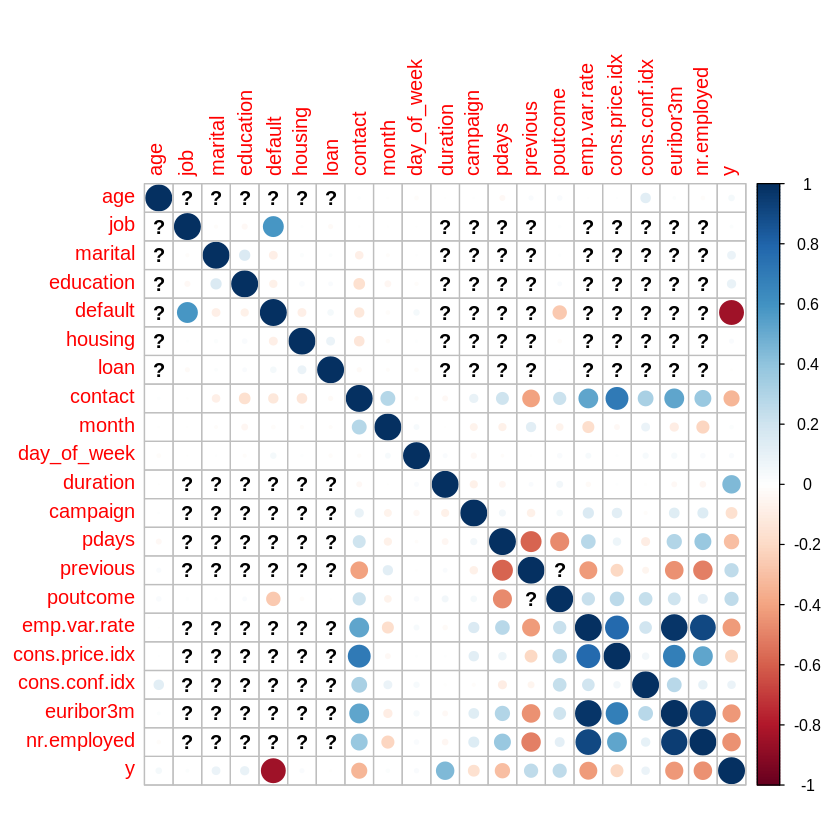

In [ ]:
# Imprimir la matriz de correlación
print(correlation_matrix)
# Visualizar la matriz de correlación
corrplot(correlation_matrix, method = "circle")

In [ ]:
mydata_clean_reduced <- mydata[, !names(mydata) %in% c("emp.var.rate", "nr.employed", "day_of_week")]
head(mydata_clean_reduced)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4814815,housemaid,married,basic.4y,no,no,no,telephone,0.05307035,0,1,nonexistent,0.6987529,0.6025105,0.9573793,no
2,0.4938272,services,married,high.school,no,no,no,telephone,0.03029687,0,1,nonexistent,0.6987529,0.6025105,0.9573793,no
3,0.2469136,services,married,high.school,no,yes,no,telephone,0.04595364,0,1,nonexistent,0.6987529,0.6025105,0.9573793,no
4,0.2839506,admin.,married,basic.6y,no,no,no,telephone,0.03070354,0,1,nonexistent,0.6987529,0.6025105,0.9573793,no
5,0.4814815,services,married,high.school,no,no,yes,telephone,0.06242375,0,1,nonexistent,0.6987529,0.6025105,0.9573793,no
6,0.3456790,services,married,basic.9y,no,no,no,telephone,0.04026027,0,1,nonexistent,0.6987529,0.6025105,0.9573793,no


### Conclusiones

## Interpretación de la Matriz de Correlación

A partir de la matriz de correlación en tu imagen:

- **Variable Objetivo (y)**: La variable **y** es la variable objetivo.
- **Variables con Colinealidad Alta**:
  - **emp.var.rate** y **euribor3m** tienen una correlación cercana a 0.9.
  - **nr.employed** y **emp.var.rate** están altamente correlacionadas.

## Variables que se Pueden Eliminar

- **emp.var.rate**: Debido a su alta correlación con **euribor3m**.
- **nr.employed**: Debido a su alta correlación con **emp.var.rate**.
- **day_of_week**: No tiene una correlación significativa con **y** ni con otras variables.



##One Hot Encoding

In [ ]:
# Variables a convertir en dummies
categorical_vars <- c("job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome")

# Convertir variables categóricas a dummies
mydata_dummies <- model.matrix(~ job + marital + education + default + housing + loan + contact + month + day_of_week + poutcome - 1, data = mydata)

# Combinar con otras columnas numéricas (si es necesario)
mydata_combined <- cbind(mydata[, !names(mydata) %in% categorical_vars], mydata_dummies)

In [ ]:
mydata <- mydata_combined
summary(mydata)

      age            duration          campaign           pdays       
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.1852   1st Qu.:0.02074   1st Qu.:0.00000   1st Qu.:1.0000  
 Median :0.2593   Median :0.03660   Median :0.01818   Median :1.0000  
 Mean   :0.2842   Mean   :0.05252   Mean   :0.02850   Mean   :0.9634  
 3rd Qu.:0.3704   3rd Qu.:0.06486   3rd Qu.:0.03636   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  
    previous        emp.var.rate    cons.price.idx   cons.conf.idx   
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.3333   1st Qu.:0.3406   1st Qu.:0.3389  
 Median :0.00000   Median :0.9375   Median :0.6033   Median :0.3766  
 Mean   :0.02471   Mean   :0.7254   Mean   :0.5357   Mean   :0.4309  
 3rd Qu.:0.00000   3rd Qu.:1.0000   3rd Qu.:0.6988   3rd Qu.:0.6025  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   euribor3m 

## Separación del conjunto de datos

In [ ]:
set.seed(1)
split <- initial_split(mydata, prop = 0.7, strata = "y")
outliers_training <- training(split)
outliers_validation <- testing(split)

#cosas

In [ ]:
mydata.tree1 <- rpart(y ~ poutcome + duration, mydata, method = "class")

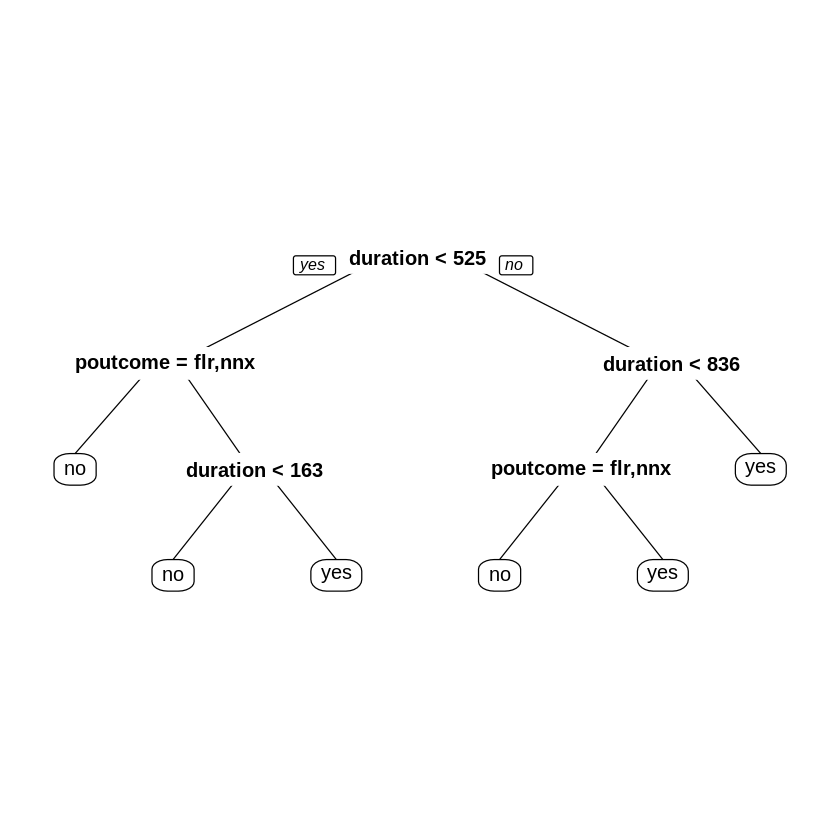

In [ ]:
prp(mydata.tree1)